# Sleep Analysis 

Hello, I'm here because I'm curious about sleep and I found dataset about sleep health and lifestyle. Let's we breakdown this data so We can get some insight of it.

But before doint it, let's import libraries that we need here.

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load Data

First we can load data from Kaggle, Basically I just donwload it from kaggle and extract it into my folder. We can load it using pandas and see data's information

In [24]:
df = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


So we have 12 columns and 374 rows table. I thing there is NULL data of sleep disoreder maybe we can do something about it.

We have 'Sleep Disorder' features that has 219 NULL Object.

We have 5 features with categorical type data

And we have 8 features with numerical data, But I think we don't have to worry about person Id so it's just 7 features


## See the whole data using pairplot

We can use seaborn to make a pairplot visualization to see how's the relationship one feature to another

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


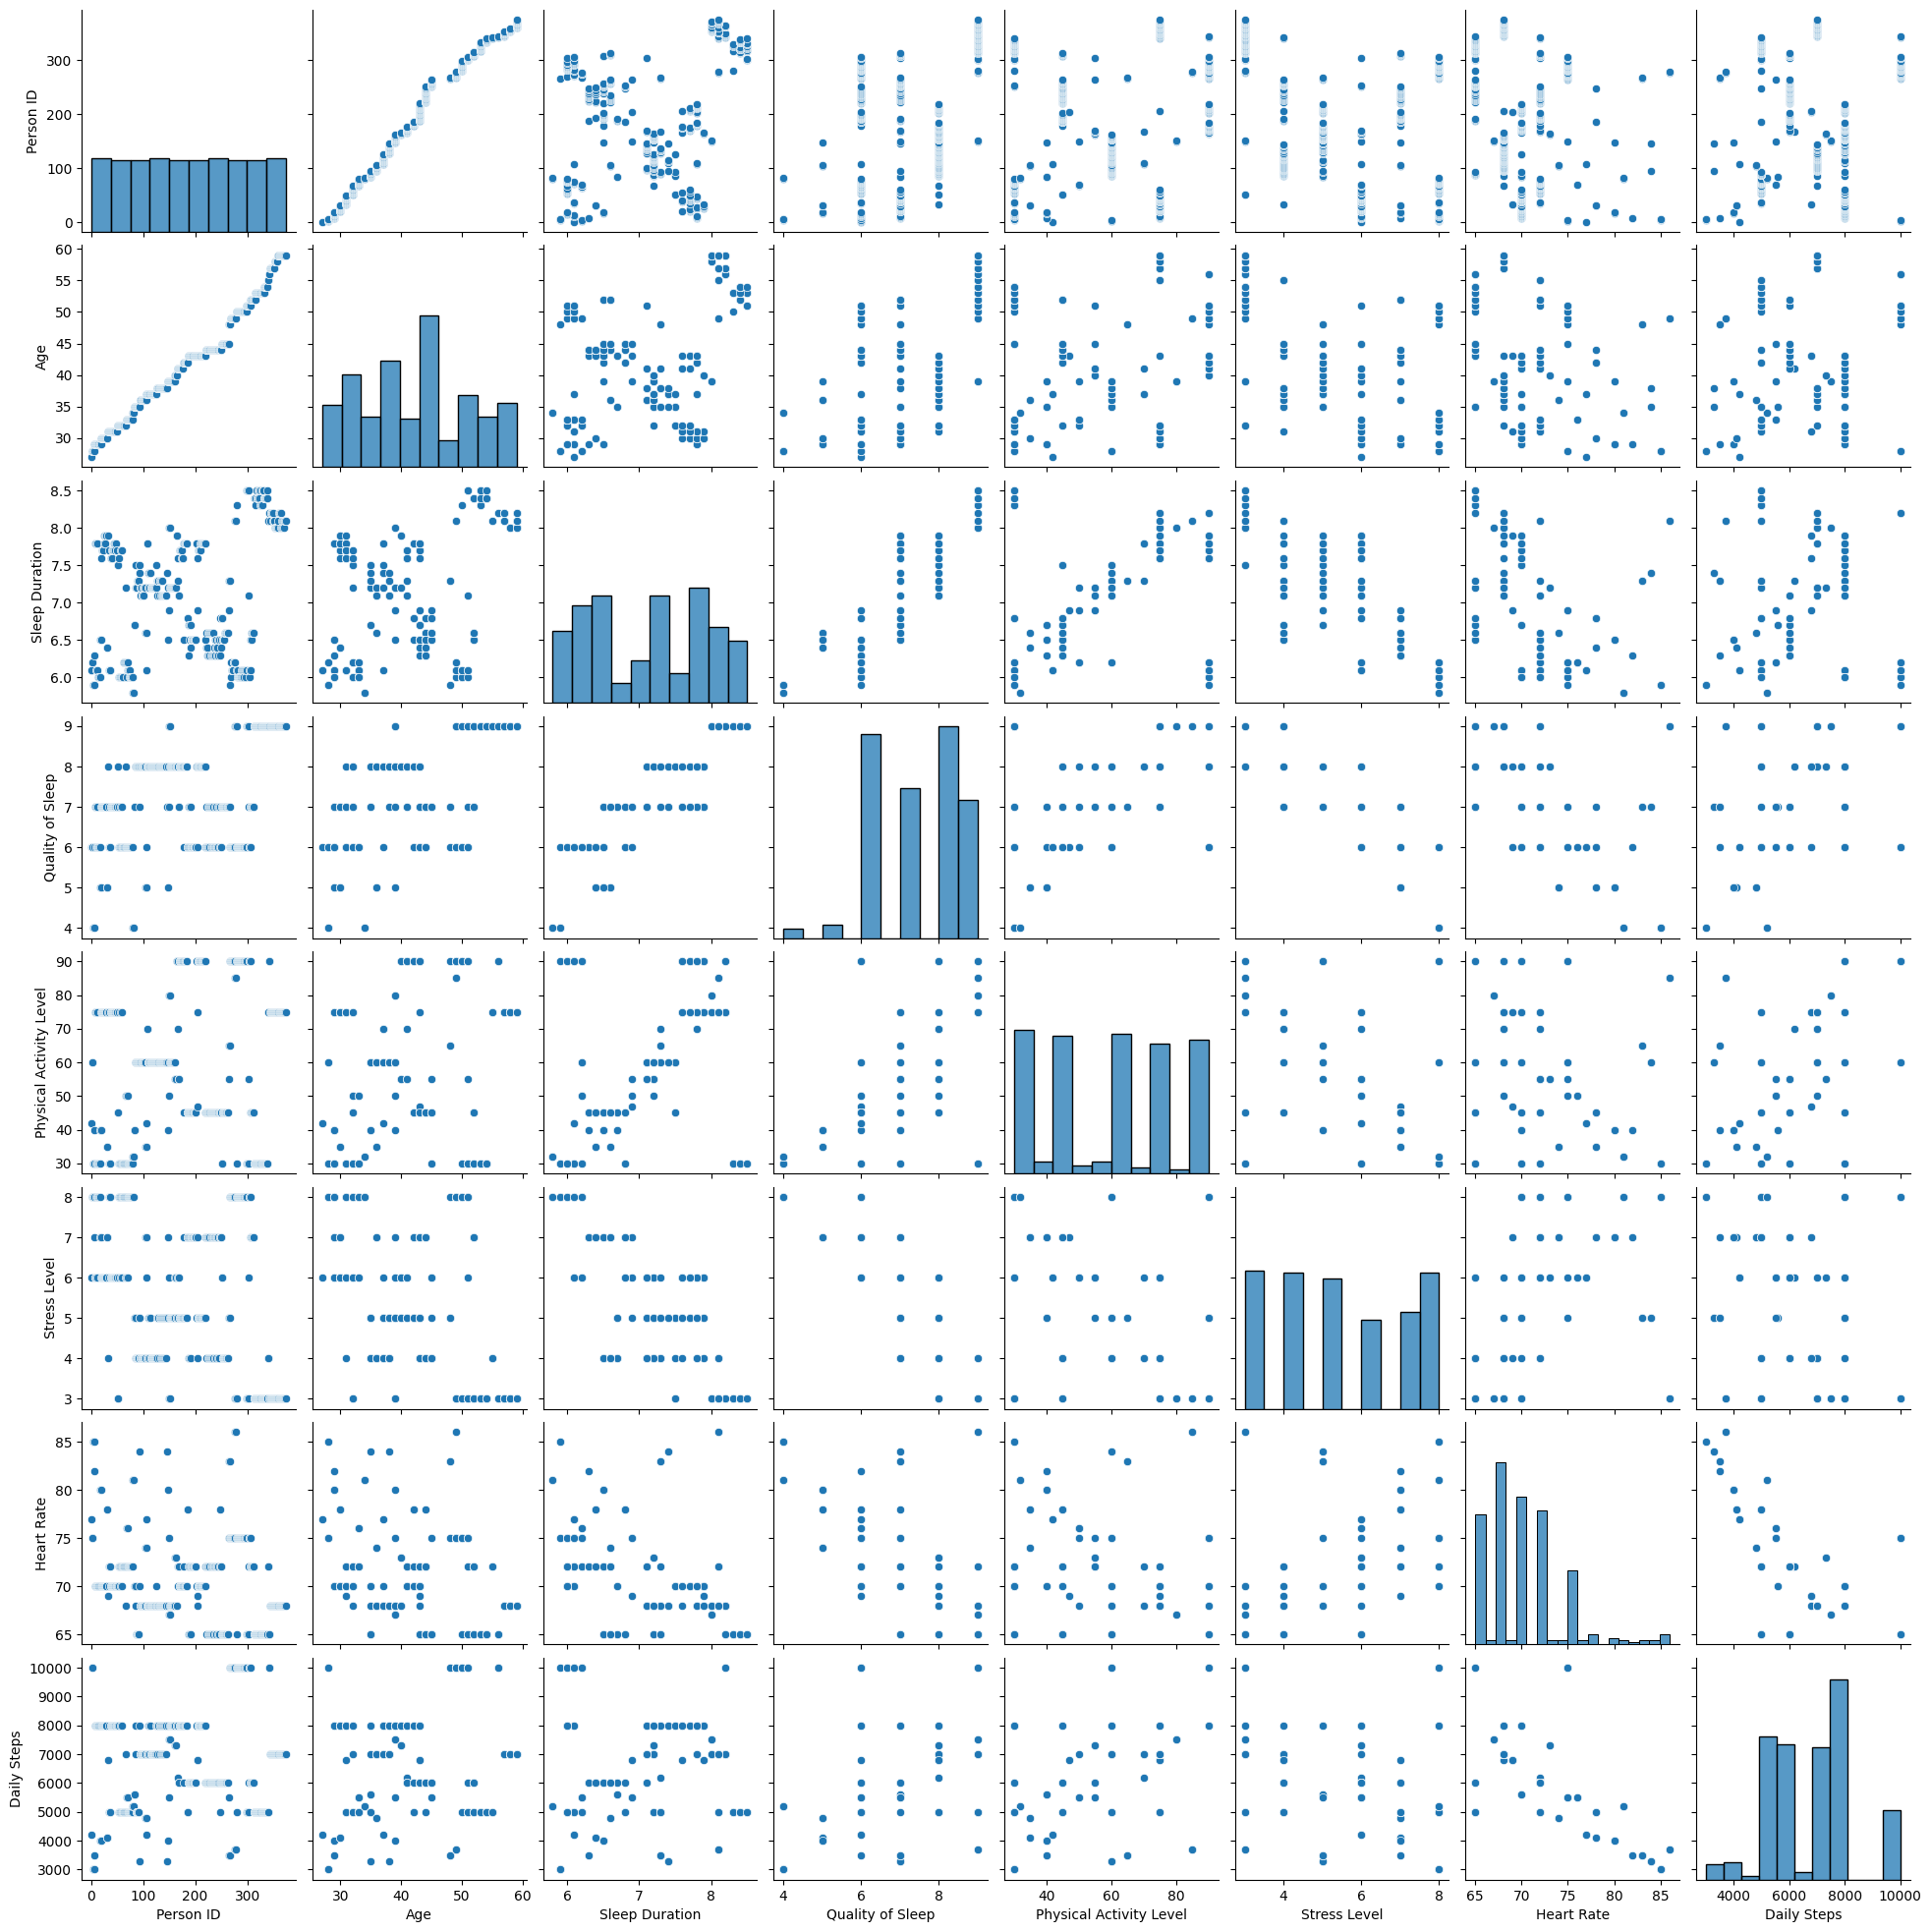

In [25]:
sns.pairplot(df)

Pairplot it's a useful and easy technique to see correlation between features. And they will automatically sort only the numerical features 

From this pairplot we can get insight:
1. Quality of Sleep is proportional with Sleep Duration, Physical Activity Level, and Daily Steps
2. Quality of Sleep is oposite of Stress Level and Heart Rate



## Pairplot 
How about we use pairplot to see the categorical features, but before that let's see what kind of categorical features that we handle

In [26]:
categorical_features = df.select_dtypes(include=['object']).columns.to_list()
categorical_features

['Gender', 'Occupation', 'BMI Category', 'Blood Pressure', 'Sleep Disorder']

Let's get numerical features too for this data

In [30]:
numerical_features = df.drop(categorical_features, axis=1).columns.to_list()
numerical_features

['Person ID',
 'Age',
 'Sleep Duration',
 'Quality of Sleep',
 'Physical Activity Level',
 'Stress Level',
 'Heart Rate',
 'Daily Steps']

In [27]:
for feature in categorical_features:
    print(f"{feature}: number of uniqe: {len(df[feature].unique())}\n{df[feature].unique()}\n\n")

Gender: number of uniqe: 2
['Male' 'Female']


Occupation: number of uniqe: 11
['Software Engineer' 'Doctor' 'Sales Representative' 'Teacher' 'Nurse'
 'Engineer' 'Accountant' 'Scientist' 'Lawyer' 'Salesperson' 'Manager']


BMI Category: number of uniqe: 4
['Overweight' 'Normal' 'Obese' 'Normal Weight']


Blood Pressure: number of uniqe: 25
['126/83' '125/80' '140/90' '120/80' '132/87' '130/86' '117/76' '118/76'
 '128/85' '131/86' '128/84' '115/75' '135/88' '129/84' '130/85' '115/78'
 '119/77' '121/79' '125/82' '135/90' '122/80' '142/92' '140/95' '139/91'
 '118/75']


Sleep Disorder: number of uniqe: 3
[nan 'Sleep Apnea' 'Insomnia']




I think we need to change null value from Sleep Disorder, so I just change nan values with string "Normal"

In [51]:
df.fillna("Normal", inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           374 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


## Sleep Disorder

I want to see if Sleep Disorder affect sleep and health by see them in pairplot, we use pairplot again with hue

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


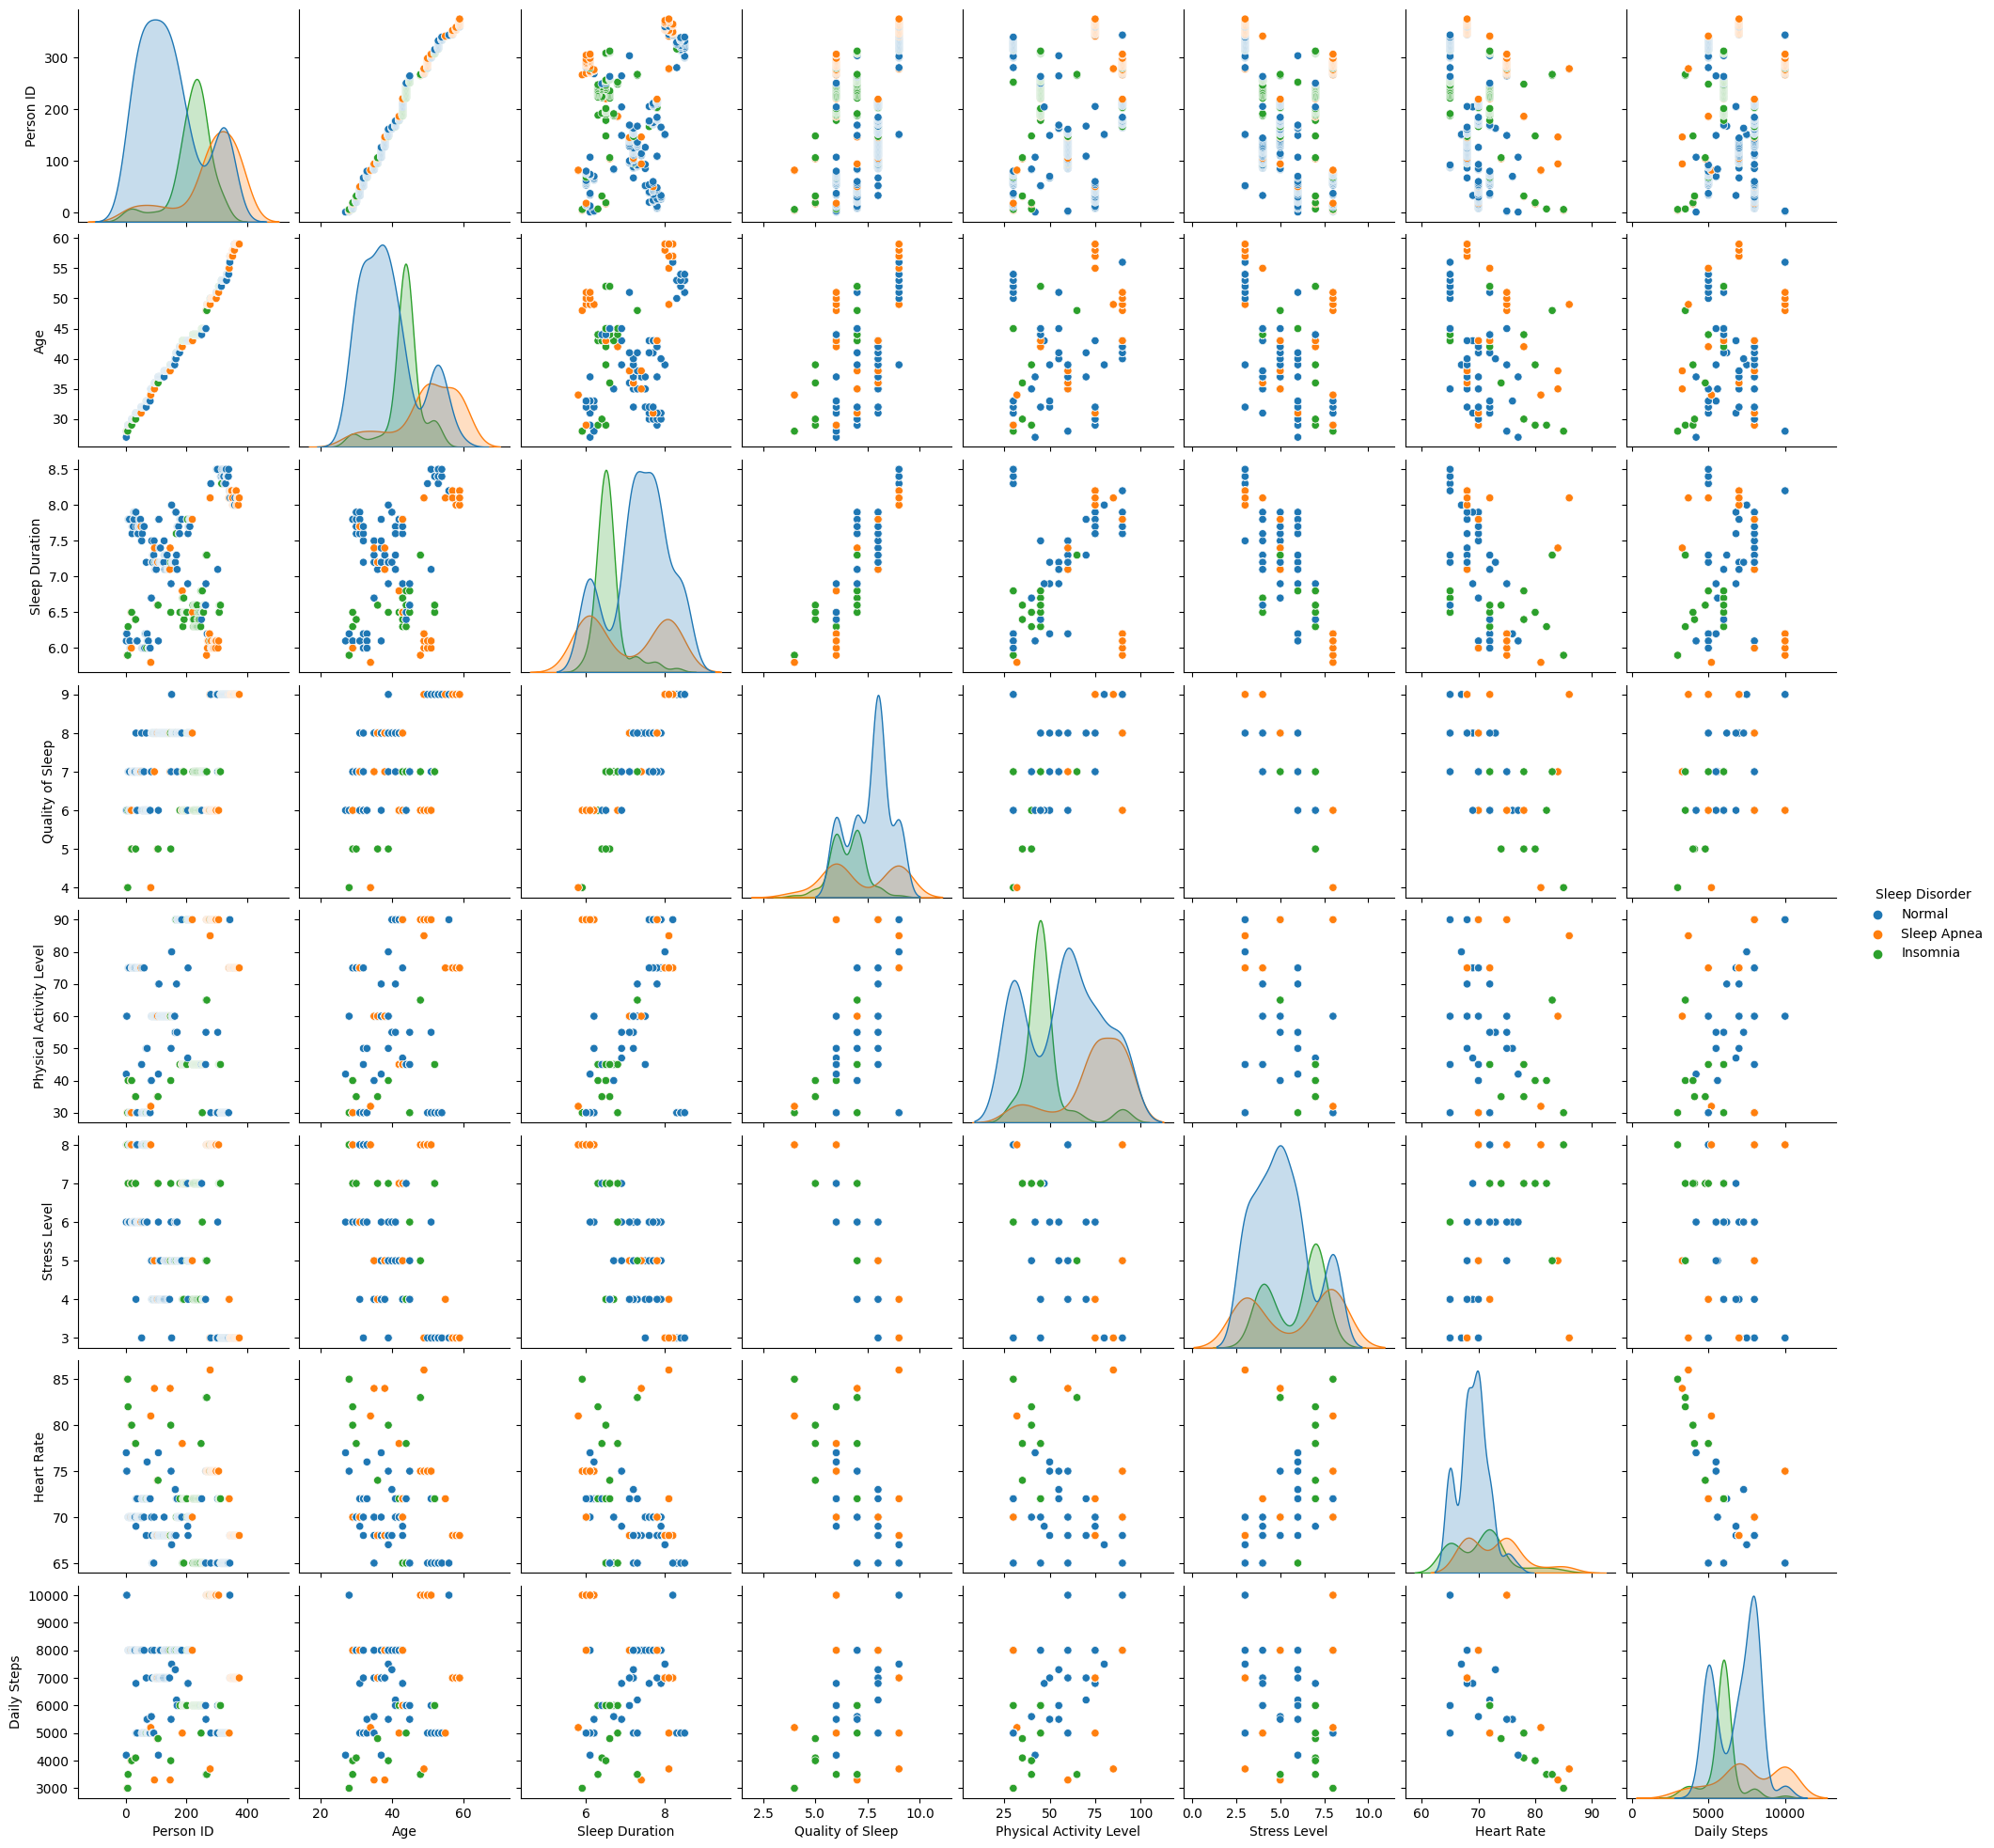

In [52]:
sns.pairplot(df, hue='Sleep Disorder')

We can see Insomnia adversely affects the quality of sleep.

I want to know how every occupation affect their health or sleep qualities, let's group data by the occupation and see average of their quality of sleep or health

In [31]:
def group_dataframe(column_names):
    new_df = df[numerical_features].copy()
    new_df[column_names] = df[column_names]
    return new_df.groupby(column_names)

In [43]:
occupation_groupby = group_dataframe('Occupation')
mean_occupation = occupation_groupby.mean()
mean_occupation.sort_values(by='Quality of Sleep')

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
Occupation,,,,,,,,
Sales Representative,4.500000,28.000000,5.900000,4.000000,30.000000,8.000000,85.000000,3000.000000
Scientist,75.500000,33.500000,6.000000,5.000000,41.000000,7.000000,78.500000,5350.000000
Salesperson,218.375000,43.531250,6.403125,6.000000,45.000000,7.000000,72.000000,6000.000000
Software Engineer,46.250000,31.250000,6.750000,6.500000,48.000000,6.000000,75.500000,5800.000000
Doctor,64.056338,32.676056,6.970423,6.647887,55.352113,6.732394,71.521127,6808.450704
Teacher,196.075000,41.725000,6.690000,6.975000,45.625000,4.525000,67.225000,5957.500000
Manager,264.000000,45.000000,6.900000,7.000000,55.000000,5.000000,75.000000,5500.000000
Nurse,295.849315,51.794521,7.063014,7.369863,78.589041,5.547945,72.000000,8057.534247
Accountant,153.054054,39.621622,7.113514,7.891892,58.108108,4.594595,68.864865,6881.081081


In [40]:
mean_occupation.index

Index(['Accountant', 'Doctor', 'Engineer', 'Lawyer', 'Manager', 'Nurse',
       'Sales Representative', 'Salesperson', 'Scientist', 'Software Engineer',
       'Teacher'],
      dtype='object', name='Occupation')

Let's visualize the quality of sleep every occupation

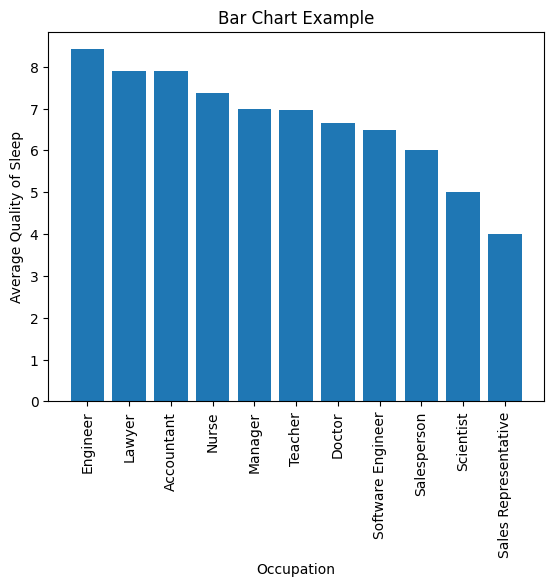

In [48]:
vis_occ_data = mean_occupation.sort_values(by='Quality of Sleep', ascending=False)
plt.bar(vis_occ_data.index, vis_occ_data['Quality of Sleep'] )
# Customize the chart
plt.xlabel('Occupation')
plt.ylabel('Average Quality of Sleep')
plt.title('Bar Chart Example')
plt.xticks(rotation=90)
plt.show()

Wow I'm pretty proud of the engineer, they have a great quality of sleep. Because the quality of sleep is affected by Physical activities, Stress Level, Heart Rate, Daily Steps and Sleep Duration too. We can get insight from this dataset that Sales Representative has a working environment that little bit bat

## Obesity and Sleep

Let's see the average quality of people based on the BMI ratio

In [55]:
bmi_groupby = group_dataframe('BMI Category')
bmi_groupby.mean().sort_values(by='Quality of Sleep')

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
BMI Category,,,,,,,,
Obese,134.900000,38.000000,6.960000,6.400000,55.000000,5.700000,84.300000,3350.000000
Overweight,260.891892,47.885135,6.770270,6.898649,61.236486,5.729730,70.945946,6965.540541
Normal Weight,135.904762,38.380952,7.333333,7.428571,60.333333,5.190476,71.285714,6766.666667
Normal,140.051282,38.482051,7.393846,7.661538,57.692308,5.128205,68.728205,6887.179487


Let's visualize it

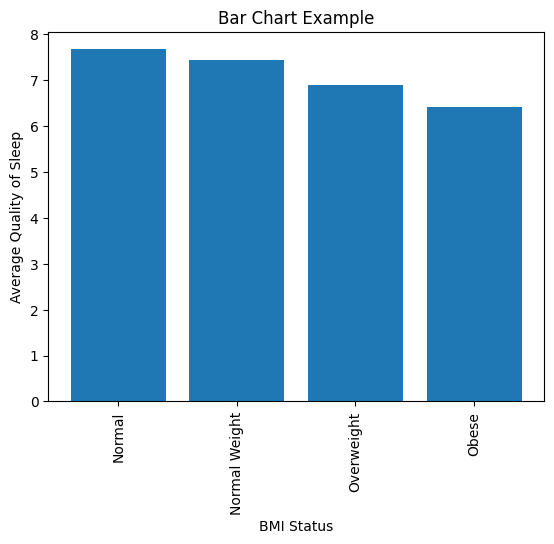

In [56]:
vis_bmi_data = bmi_groupby.mean().sort_values(by='Quality of Sleep', ascending=False)
plt.bar(vis_bmi_data.index, vis_bmi_data['Quality of Sleep'] )
# Customize the chart
plt.xlabel('BMI Status')
plt.ylabel('Average Quality of Sleep')
plt.title('Bar Chart Example')
plt.xticks(rotation=90)
plt.show()

## Conclusion

I think from this dataset we can see that activity, heart rate can affect sleeps and sleep can affect the health too. If we want to make our healt better, let's just start with our daily steps because it's really easy and then start make a good sleep